In [1]:
import pandas as pd

# Define the file path (it looks inside the 'data' folder)
file_path = 'data/train.csv'

# Define the columns we want to load to save memory
cols_to_use = [
    'click', 'hour', 'banner_pos', 'site_category', 'app_category', 
    'device_type', 'device_id', 'device_ip'
]

# Load a sample of 2 million rows using only the columns we need
df = pd.read_csv(file_path, usecols=cols_to_use, nrows=2000000)

# Display the first 5 rows to confirm it loaded
df.head()

,click,hour,banner_pos,site_category,app_category,device_id,device_ip,device_type
0,0,14102100,0,28905ebd,07d7df22,a99f214a,ddd2926e,1
1,0,14102100,0,28905ebd,07d7df22,a99f214a,96809ac8,1
2,0,14102100,0,28905ebd,07d7df22,a99f214a,b3cf8def,1
3,0,14102100,0,28905ebd,07d7df22,a99f214a,e8275b8f,1
4,0,14102100,1,0569f928,07d7df22,a99f214a,9644d0bf,1


In [3]:
import matplotlib.pyplot as plt

# --- 1. Get a Technical Summary ---
# 'df.info()' shows column names, data types, and if any data is missing.
print("--- Data Info ---")
df.info()

# --- 2. Analyze the 'click' Column ---
# 'value_counts()' counts the 0s (no-clicks) and 1s (clicks).
print("\n--- Click Distribution ---")
click_counts = df['click'].value_counts()
print(click_counts)

# Calculate the overall Click-Through Rate (CTR)
ctr = (click_counts[1] / len(df)) * 100
print(f"\nOverall Click-Through Rate: {ctr:.2f}%")

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   click          int64 
 1   hour           int64 
 2   banner_pos     int64 
 3   site_category  object
 4   app_category   object
 5   device_id      object
 6   device_ip      object
 7   device_type    int64 
dtypes: int64(4), object(4)
memory usage: 122.1+ MB

--- Click Distribution ---
click
0    1676791
1     323209
Name: count, dtype: int64

Overall Click-Through Rate: 16.16%



--- Analyzing CTR by Hour ---
hour_of_day
00    17.471388
01    17.369509
02    15.069576
03    16.979132
04    15.120641
05    14.884461
06    16.125897
07    16.975219
08    16.994461
09    16.396384
Name: click, dtype: float64


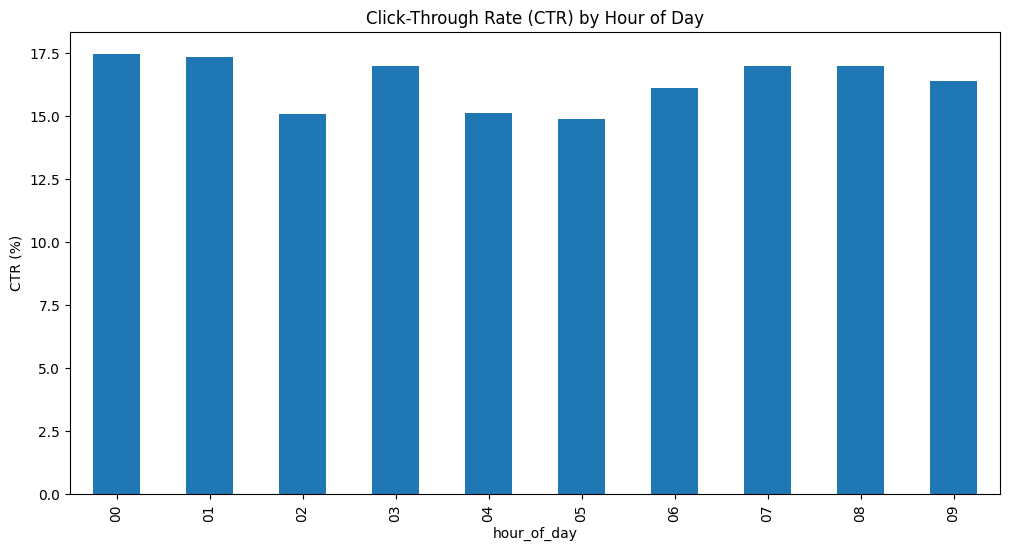


--- Analyzing CTR by Banner Position ---
banner_pos
0    15.234397
1    19.081480
2    11.261872
3     0.000000
4    17.647059
5     8.155255
7     6.037736
Name: click, dtype: float64


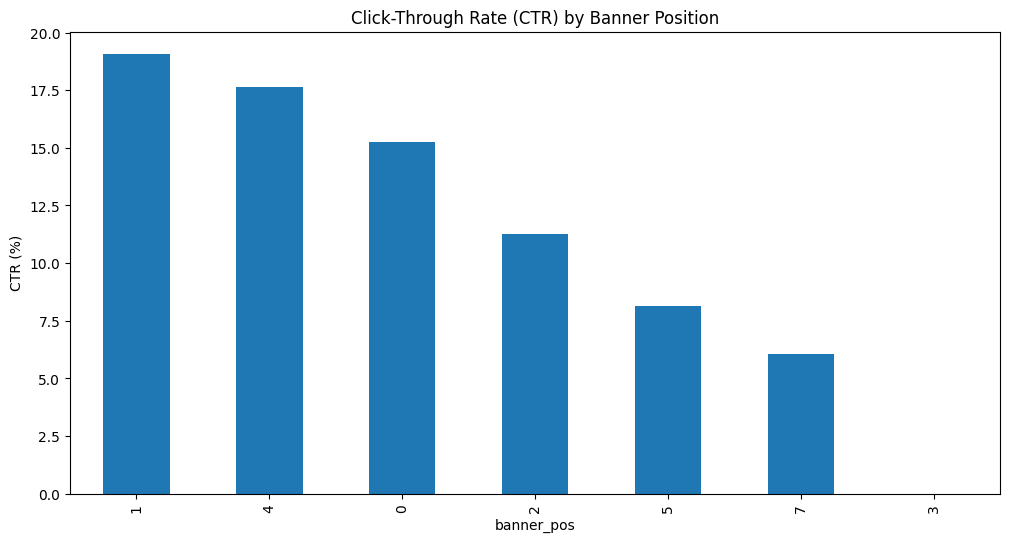


--- Analyzing CTR by App Category ---
app_category
dc97ec06    21.565731
07d7df22    19.210530
8df2e842    16.071429
f95efa07    15.921413
a86a3e89    14.843750
18b1e0be    14.285714
4681bb9d    12.307692
879c24eb    11.193112
0f2161f8    10.901540
0f9a328c    10.638298
Name: click, dtype: float64


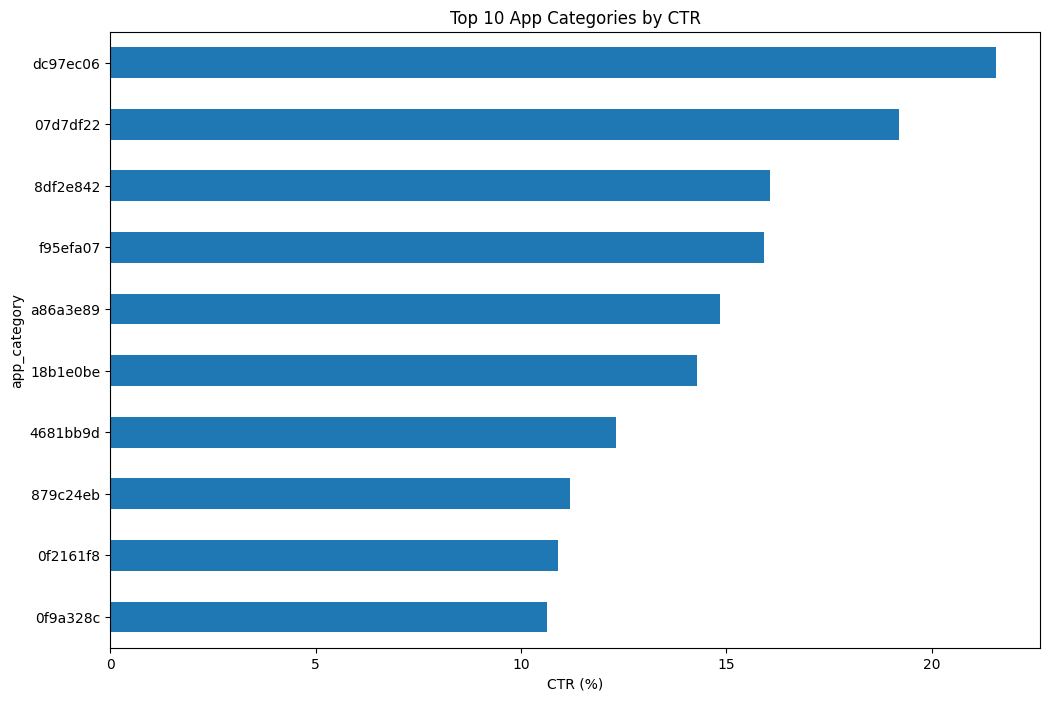

In [4]:
# --- 3. Analyze CTR by Hour of Day ---
print("\n--- Analyzing CTR by Hour ---")
# First, create the 'hour_of_day' column by extracting the last 2 digits
df['hour_of_day'] = df['hour'].astype(str).str[-2:]

# Group by hour and calculate the mean of 'click' (which is the CTR)
hourly_ctr = df.groupby('hour_of_day')['click'].mean() * 100
print(hourly_ctr)

# Plot the results for CTR by Hour
hourly_ctr.plot(kind='bar', figsize=(12, 6), title='Click-Through Rate (CTR) by Hour of Day', ylabel='CTR (%)')
plt.show() # This command displays the plot


# --- 4. Analyze CTR by Banner Position ---
print("\n--- Analyzing CTR by Banner Position ---")
# Group by banner position and calculate CTR
banner_ctr = df.groupby('banner_pos')['click'].mean() * 100
print(banner_ctr)

# Plot the results for CTR by Banner Position
banner_ctr.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Click-Through Rate (CTR) by Banner Position', ylabel='CTR (%)')
plt.show()


# --- 5. Analyze CTR by App Category ---
print("\n--- Analyzing CTR by App Category ---")
# Group by app category and calculate CTR
app_category_ctr = df.groupby('app_category')['click'].mean() * 100

# Get the Top 10 categories to keep the plot clean
top_10_apps = app_category_ctr.sort_values(ascending=False).head(10)
print(top_10_apps)

# Plot the results for the Top 10 App Categories
top_10_apps.plot(kind='barh', figsize=(12, 8), title='Top 10 App Categories by CTR', xlabel='CTR (%)')
ax = plt.gca() # Get current axes
ax.invert_yaxis() # Invert y-axis so the highest is at the top
plt.show()